In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv')
X_test = pd.read_csv('agg_Xtest.csv')
y_train = pd.read_csv('agg_ytrain.csv')
y_test = pd.read_csv('agg_ytest.csv')

In [3]:
X_train = X_train.set_index('Unnamed: 0')
X_test = X_test.set_index('Unnamed: 0')
y_train = y_train.set_index('Unnamed: 0')
y_test = y_test.set_index('Unnamed: 0')

In [4]:
#tscv = TimeSeriesSplit(n_splits=10)
tscv = KFold(n_splits=5)


parameters = {'weights':['uniform','distance'],
              'metric':['minkowski','euclidean','manhattan'],
              'leaf_size':[20,30,40],
              'n_neighbors':[5,10,15,20,25,30,35,40,45],
    }
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, cv=tscv)

In [5]:
%%time
clf.fit(X_train,y_train)
clf.best_params_

CPU times: user 1min 43s, sys: 27.7 s, total: 2min 10s
Wall time: 23 s


{'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [8]:
%%time
knn.set_params(**clf.best_params_)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.3349765444461558, recall: 0.2531328320802005, f1score: 0.27523684939932674
CPU times: user 122 ms, sys: 16.5 ms, total: 139 ms
Wall time: 36.1 ms


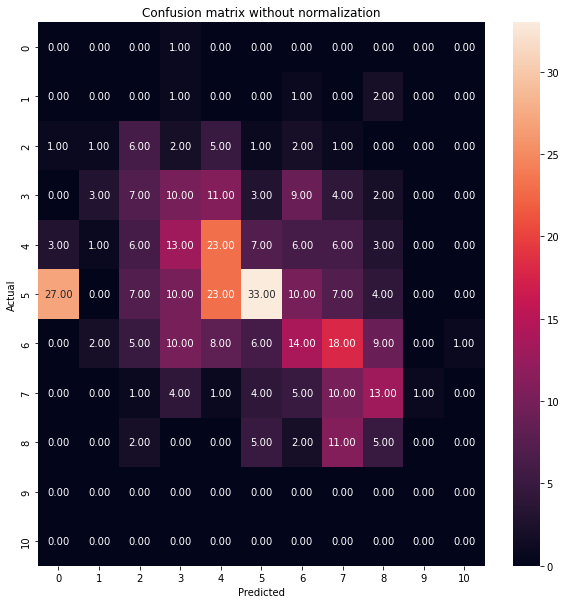

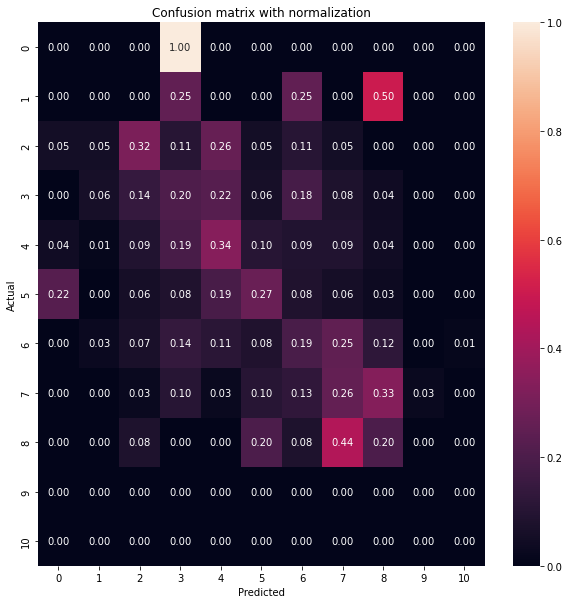

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)